# Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [2]:
d = pd.read_csv('Project_1__CoffeeShopMenu.csv')
d

,Category,Beverage,Size,Milk,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
0,Coffee,Brewed Coffee,Short,None,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,Coffee,Brewed Coffee,Tall,None,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,Coffee,Brewed Coffee,Grande,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
3,Coffee,Brewed Coffee,Venti,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
4,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Whole Milk,260,4.0,2.0,0.1,10,190,53,0,52,4.0
234,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Soymilk,240,2.0,0.2,0.0,0,180,51,1,49,3.0
235,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Nonfat Milk,310,0.2,0.1,0.0,5,260,70,0,69,6.0
236,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      238 non-null    object 
 1   Beverage      238 non-null    object 
 2   Size          238 non-null    object 
 3   Milk          238 non-null    object 
 4   Calories      238 non-null    int64  
 5   TotalFat      238 non-null    float64
 6   TransFat      238 non-null    float64
 7   SaturatedFat  238 non-null    float64
 8   Sodium        238 non-null    int64  
 9   TotalCarb     238 non-null    int64  
 10  Cholesterol   238 non-null    int64  
 11  DietaryFibre  238 non-null    int64  
 12  Sugars        238 non-null    int64  
 13  Protein       238 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 26.2+ KB


There aren't any non valued rows or columns.

In [4]:
d.columns

Index(['Category', 'Beverage', 'Size', 'Milk', 'Calories', 'TotalFat',
       'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol',
       'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

In [5]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,238.0,193.810924,103.668135,0.0,120.0,185.0,260.00,510.0
TotalFat,238.0,2.931933,2.956133,0.0,0.2,2.5,4.50,15.0
TransFat,238.0,1.318908,1.648097,0.0,0.1,0.5,2.00,9.0
SaturatedFat,238.0,0.037815,0.071737,0.0,0.0,0.0,0.10,0.3
Sodium,238.0,6.407563,8.679348,0.0,0.0,5.0,10.00,40.0
TotalCarb,238.0,128.067227,82.656396,0.0,70.0,120.0,170.00,340.0
Cholesterol,238.0,35.878151,20.927388,0.0,21.0,34.0,50.75,90.0
DietaryFibre,238.0,0.815126,1.455189,0.0,0.0,0.0,1.00,8.0
Sugars,238.0,32.819328,19.838082,0.0,18.0,32.0,43.75,84.0
Protein,238.0,7.032773,4.893173,0.0,3.0,6.0,10.00,20.0


# Univariate Analysis

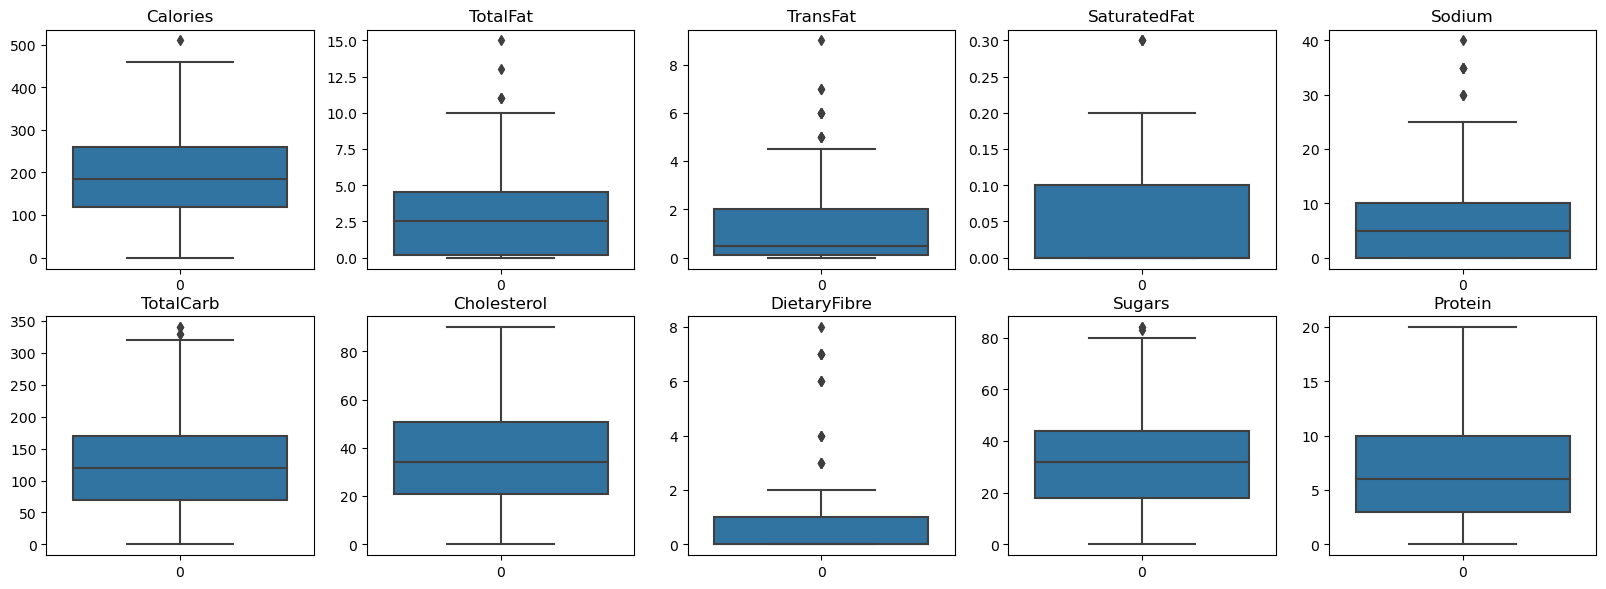

In [6]:
# Separating the categorical and numerical variables :
objects = d.dtypes[d.dtypes == 'object'].index
numericals = d.dtypes[d.dtypes != 'object'].index
count = 1
plt.figure(figsize = (20, 18))
for i in numericals :
    plt.subplot(5, 5, count)
    sns.boxplot(d[i])
    plt.title(i)
    count += 1

From the above boxplots we can infer that, the Cholesterol, Calories and Sugars are not having much skewness. The variables such as TotalFat, TransFat, Sodium and DietaryFibre are having many outliers, on removing affects the correlation with the Dependent variable (Calories).

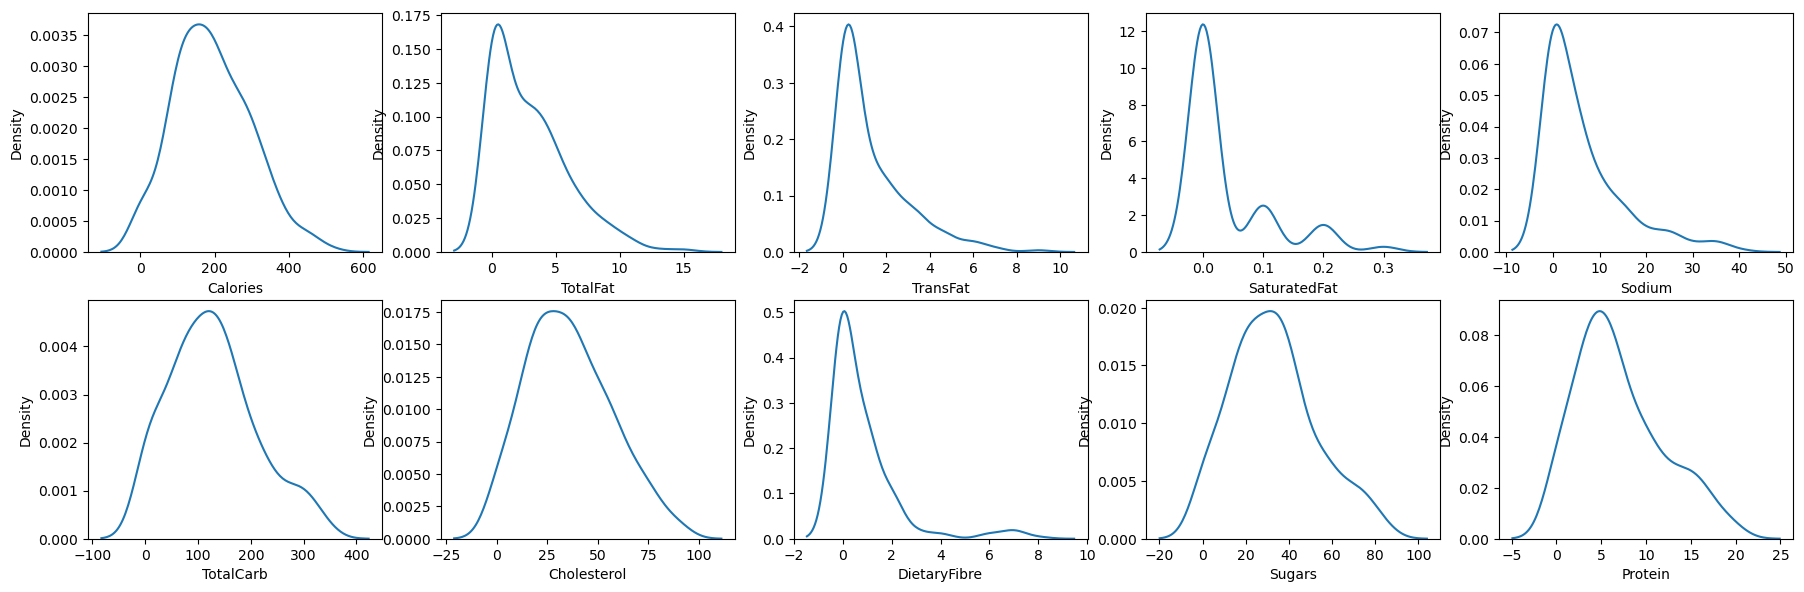

In [7]:
count = 1
plt.figure(figsize = (22, 18))
for i in numericals :
    plt.subplot(5, 5, count)
    sns.kdeplot(d[i])
    count += 1 

In [8]:
d['Milk'].value_counts()

Nonfat Milk    81
Soymilk        65
2% Milk        50
None           27
Whole Milk     15
Name: Milk, dtype: int64

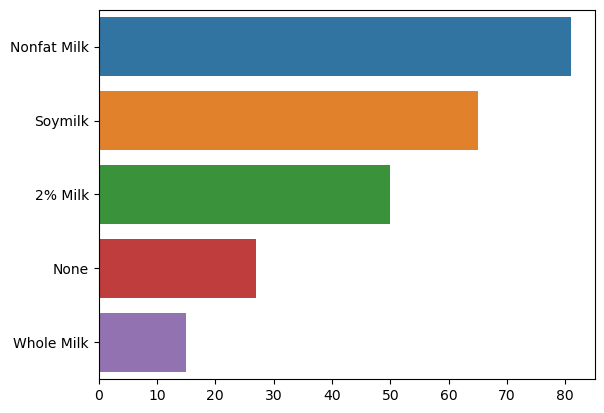

In [9]:
sns.barplot(x = d['Milk'].value_counts().values, y = d['Milk'].value_counts().index);

The menu contains the beverages which are of maximum of NonFat Milk type, which the coffee shop considers it as the lowest calorie drink. On the other hand, whole milk which has the highest calorie content is seem to be less on the menu.

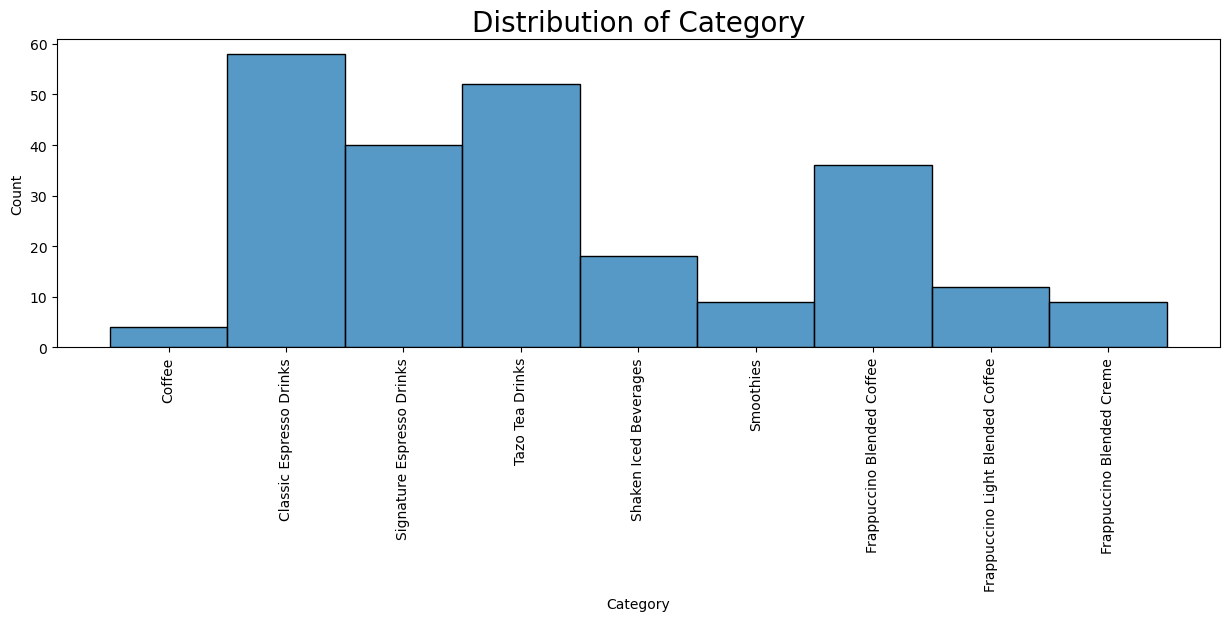

In [10]:
plt.figure(figsize = (15,4))
sns.histplot(d['Category'])
plt.xticks(rotation = 'vertical', fontsize = 10)
plt.title('Distribution of Category', fontsize = 20);

Highest on menu : Classic Expresso Drinks, Tazo Tea Drinks and Signature Expresso Drinks.

Least on menu : Coffee and Smoothies.

In [11]:
d['Category'].value_counts()

Classic Espresso Drinks             58
Tazo Tea Drinks                     52
Signature Espresso Drinks           40
Frappuccino Blended Coffee          36
Shaken Iced Beverages               18
Frappuccino Light Blended Coffee    12
Smoothies                            9
Frappuccino Blended Creme            9
Coffee                               4
Name: Category, dtype: int64

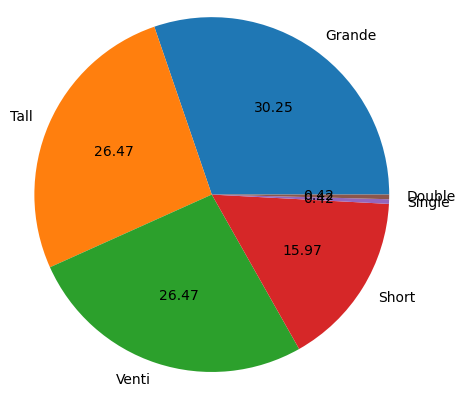

In [12]:
plt.pie(d['Size'].value_counts(), labels = d['Size'].value_counts().index, autopct = '%1.2f', radius = 1.2);

In [13]:
d['Size'].value_counts()

Grande    72
Tall      63
Venti     63
Short     38
Single     1
Double     1
Name: Size, dtype: int64

Grande, Tall, Venti are the majorly used size of any beverage, whereas Double and Single are least used.

# Bivariate Analysis

In [14]:
d[['Calories', 'TotalFat', 'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol', 'DietaryFibre', 'Sugars', 'Protein']].corr()

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Calories,1.000000,0.636476,0.645691,0.332305,0.388229,0.796933,0.940820,0.386000,0.911007,0.581001
TotalFat,0.636476,1.000000,0.889677,0.618044,0.585912,0.460300,0.379539,0.257285,0.338384,0.549996
TransFat,0.645691,0.889677,1.000000,0.693413,0.706656,0.533636,0.445614,0.129895,0.426742,0.496012
SaturatedFat,0.332305,0.618044,0.693413,1.000000,0.920493,0.242933,0.164689,-0.094424,0.182713,0.288548
Sodium,0.388229,0.585912,0.706656,0.920493,1.000000,0.294795,0.201423,-0.061158,0.208555,0.496262
TotalCarb,0.796933,0.460300,0.533636,0.242933,0.294795,1.000000,0.765836,0.178905,0.770051,0.419695
Cholesterol,0.940820,0.379539,0.445614,0.164689,0.201423,0.765836,1.000000,0.346333,0.984227,0.365335
DietaryFibre,0.386000,0.257285,0.129895,-0.094424,-0.061158,0.178905,0.346333,1.000000,0.188848,0.539622
Sugars,0.911007,0.338384,0.426742,0.182713,0.208555,0.770051,0.984227,0.188848,1.000000,0.268728
Protein,0.581001,0.549996,0.496012,0.288548,0.496262,0.419695,0.365335,0.539622,0.268728,1.000000


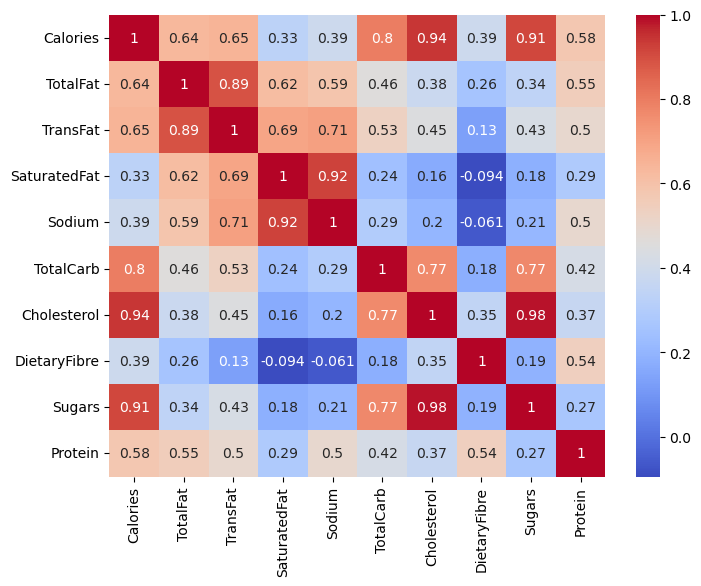

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(d[['Calories', 'TotalFat', 'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol', 'DietaryFibre', 'Sugars', 'Protein']].corr(), annot = True, cmap = 'coolwarm');

Calories is seem to have better positive correlation with : Cholesterol TotalFat, TransFat and Sugars. All the independent variables are having positive correlation with the Calories.

In [16]:
d.groupby('Category').mean().sort_values('Calories', ascending = False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [17]:
pd.pivot_table(data = d, values = 'Calories', index = 'Category', columns = 'Milk', aggfunc = 'mean')

Milk,2% Milk,None,Nonfat Milk,Soymilk,Whole Milk
Category,,,,,
Classic Espresso Drinks,184.375000,11.666667,134.500000,151.250000,NaN
Coffee,NaN,4.250000,NaN,NaN,NaN
Frappuccino Blended Coffee,NaN,NaN,267.500000,268.333333,295.000000
Frappuccino Blended Creme,NaN,NaN,236.666667,243.333333,266.666667
Frappuccino Light Blended Coffee,NaN,NaN,162.500000,NaN,NaN
Shaken Iced Beverages,130.000000,106.666667,116.666667,120.000000,NaN
Signature Espresso Drinks,275.833333,247.500000,233.333333,241.666667,NaN
Smoothies,286.666667,NaN,276.666667,283.333333,NaN
Tazo Tea Drinks,211.875000,0.000000,175.625000,188.750000,NaN


Smoothies are having the highest calories and proteins than any other drink at 2% milk content. Whereas the coffee is having least amount of calories and proteins, both these drinks are kept less on the menu. Classic Espresso drinks are having more proteins compared to others at minimum calories.

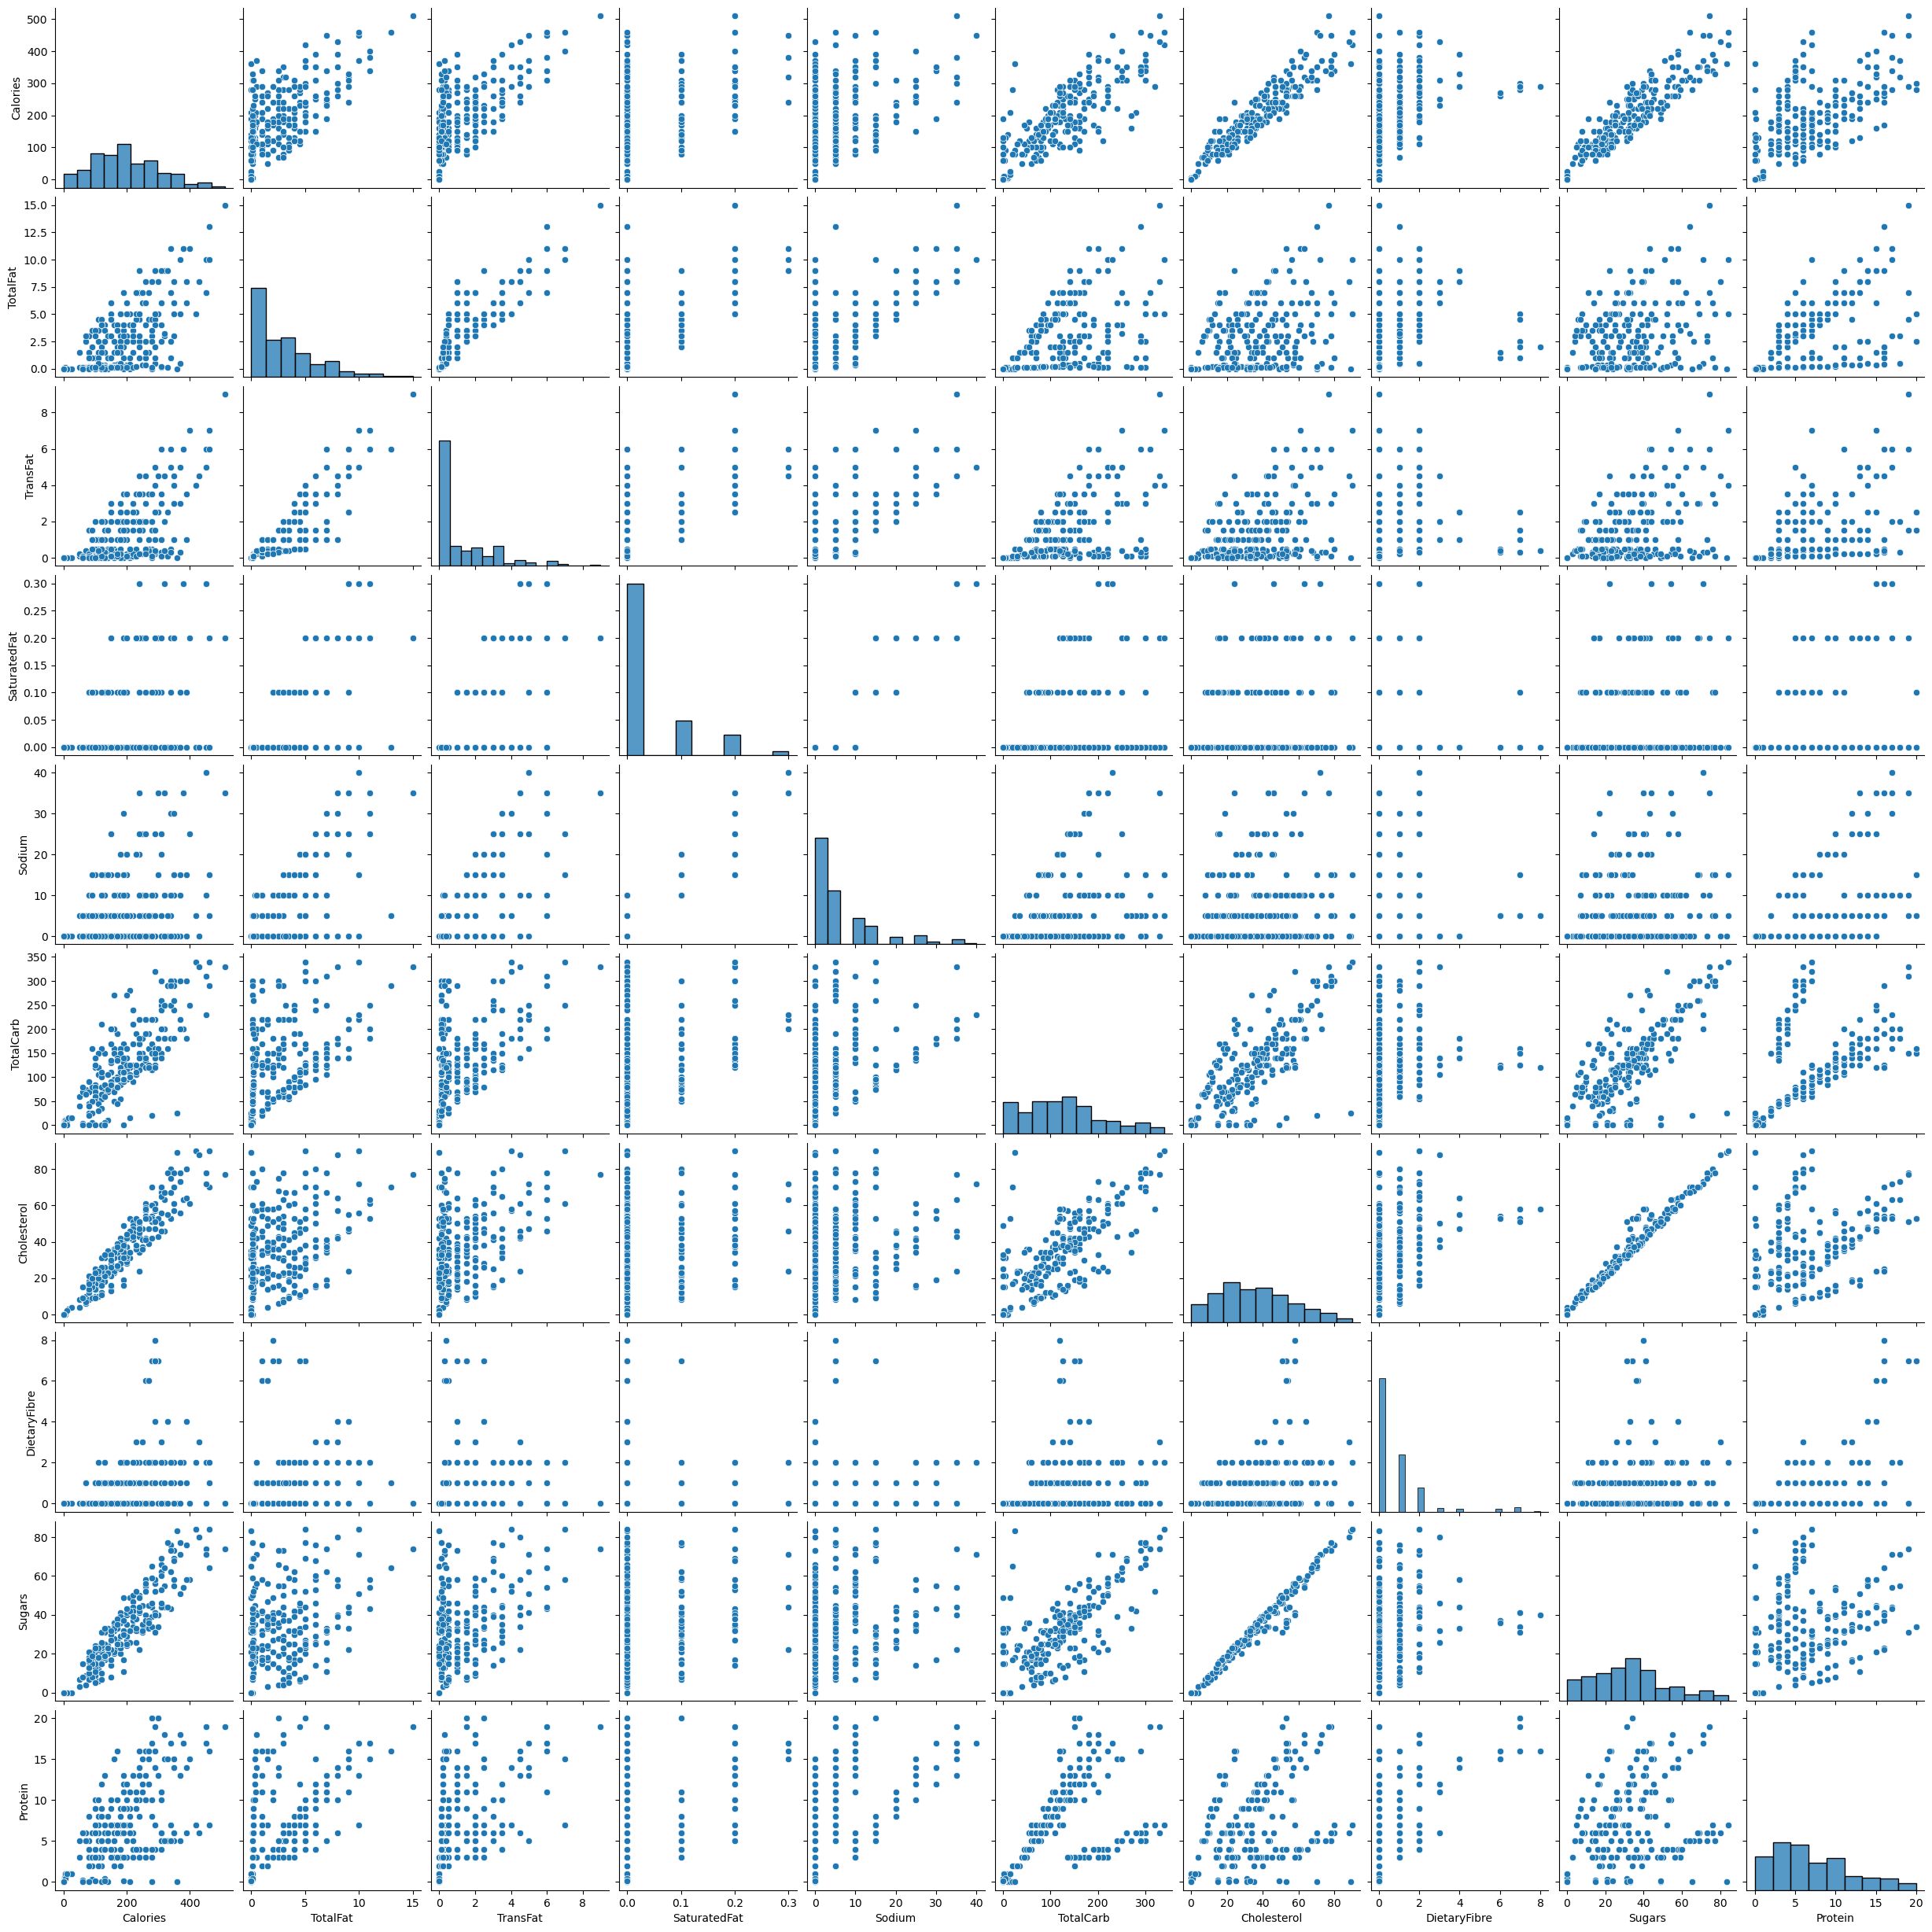

In [18]:
sns.pairplot(d);

Many independent variables are also having good correlation apart from dependent variales. Its to be noted that, more the correlation between the independent variables, less will be the predictibility of the model.

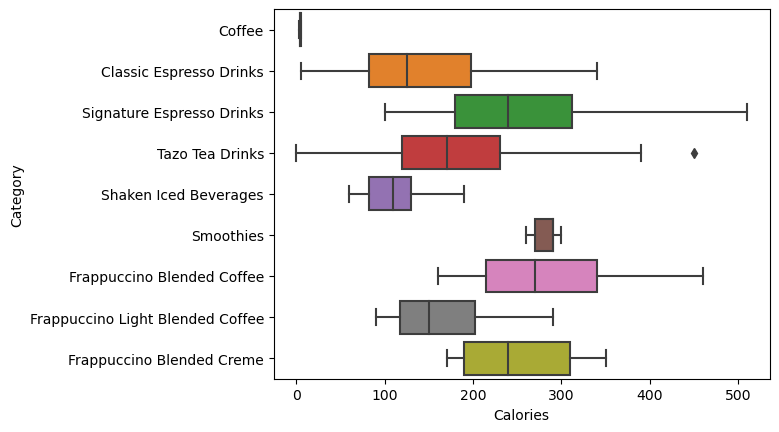

In [19]:
sns.boxplot(y = d['Category'], x = d['Calories'], orient = 'horizontal');

Each beverages are having variable median calories.

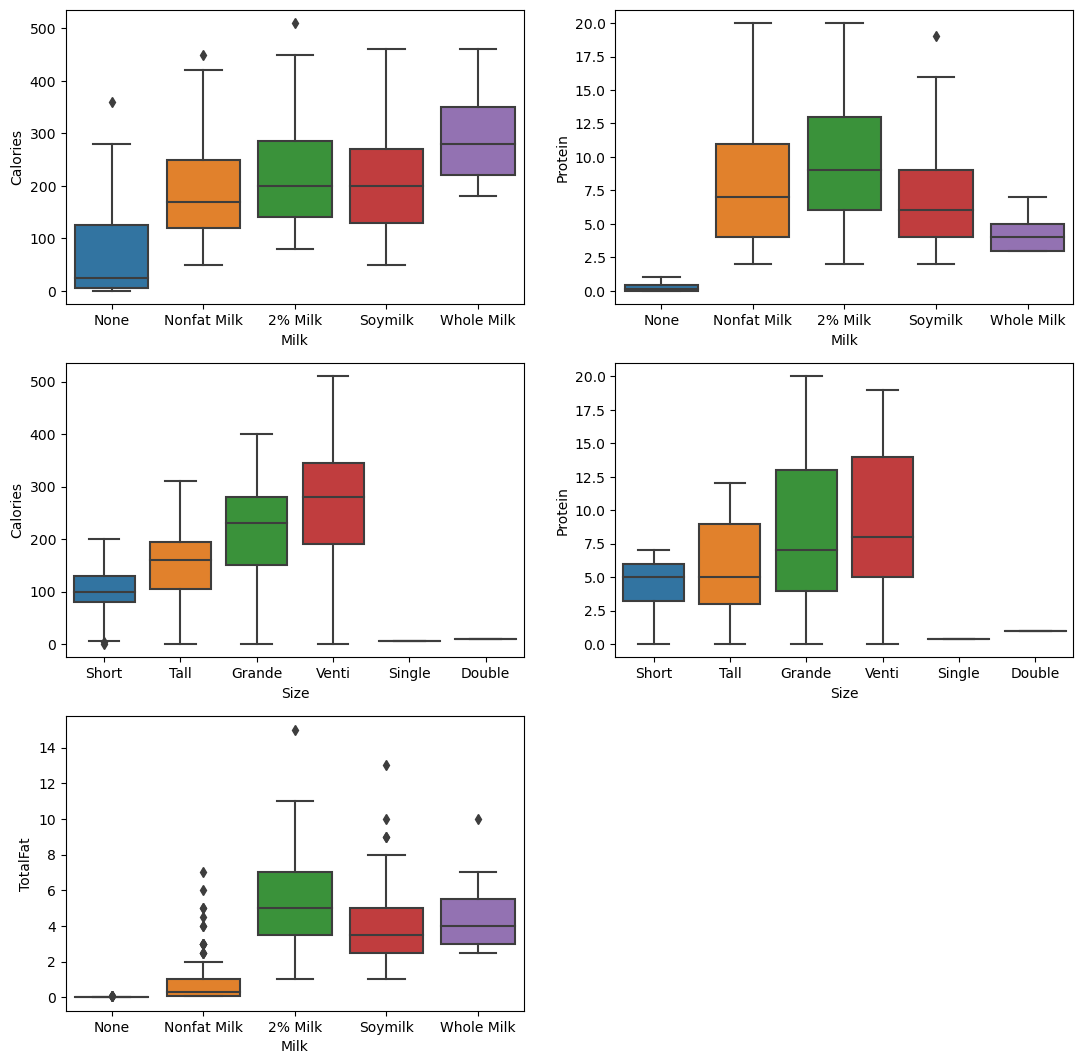

In [20]:
plt.figure(figsize = (13, 13))
plt.subplot(3, 2, 1)
sns.boxplot(x = d['Milk'], y = d['Calories'])
plt.subplot(3, 2, 2)
sns.boxplot(x = d['Milk'], y = d['Protein'])
plt.subplot(3, 2, 3)
sns.boxplot(x = d['Size'], y = d['Calories'])
plt.subplot(3, 2, 4)
sns.boxplot(x = d['Size'], y = d['Protein'])
plt.subplot(3, 2, 5)
sns.boxplot(x = d['Milk'], y = d['TotalFat']);

The Whole milk possess more calorie content. The drinks having Soymilk and 2% Milk are almost having same calories. The drinks containing other than milk are almost seem to have no calories.

Drinks having 2% Milk content are having more proteins than the whole milk.

Its obvious that more the size of the drink, more will be the calories and proteins.

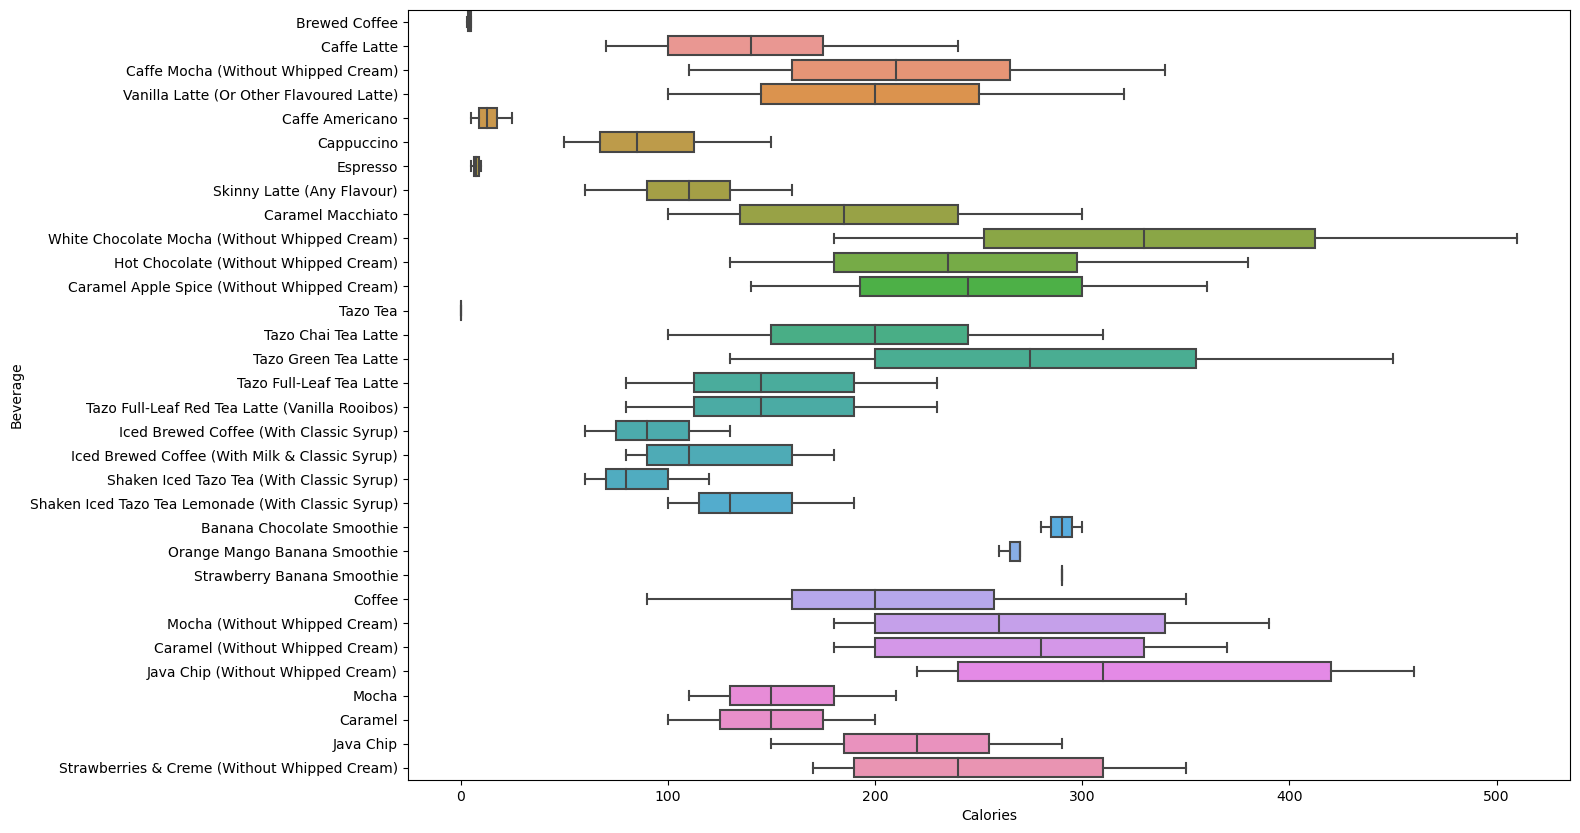

In [21]:
plt.figure(figsize = (15,10))
sns.boxplot(y = d['Beverage'], x = d['Calories'], orient = 'horizontal');

Beverages such as White Chocolate Mocha, Tazo Green Tea Latte and Java Chip are having the highest calorie content. Whereas Espresso, Caffe Americano and Brewed Coffee possess least calories.

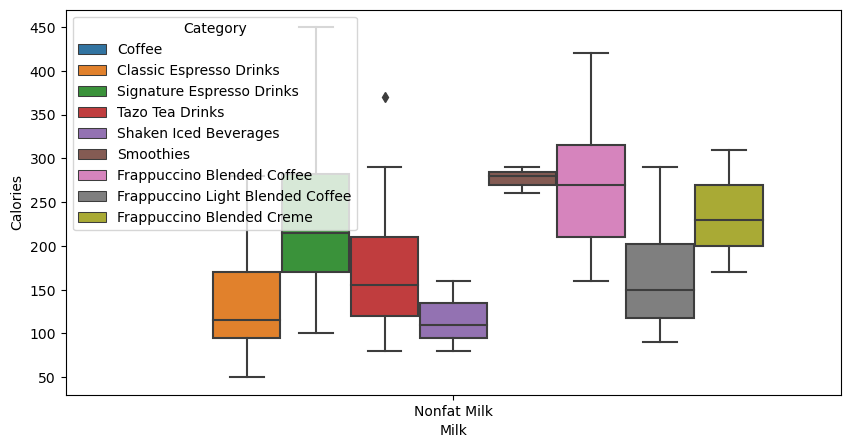

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = d['Milk'][d['Milk'] == 'Nonfat Milk'], y = d['Calories'], hue = d['Category']);

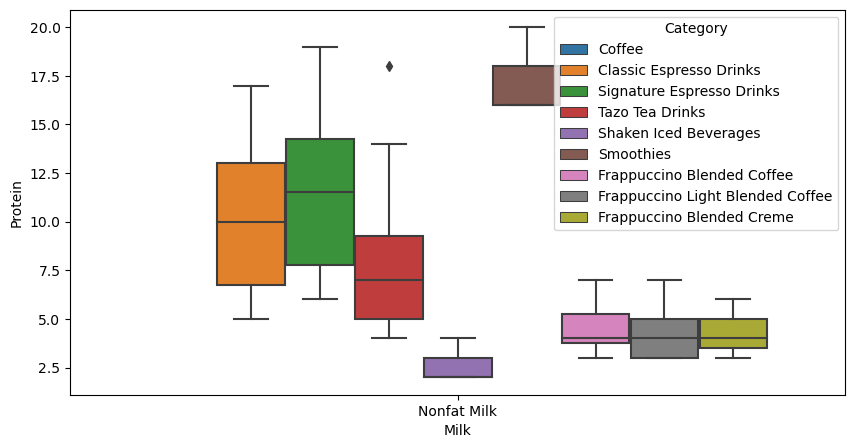

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = d['Milk'][d['Milk'] == 'Nonfat Milk'], y = d['Protein'], hue = d['Category']);

Smoothies and Shaken Iced Beverages of NonFat Milk type are having the highest and least amounts of calories and proteins respectively.

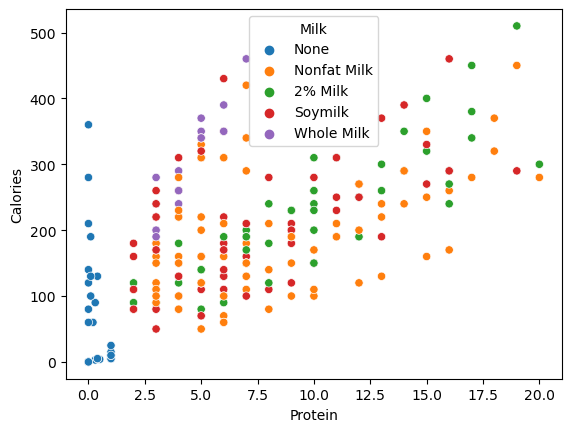

In [24]:
sns.scatterplot(x = d['Protein'], y = d['Calories'], hue = d['Milk']);

# Hypothesis Testing : ANOVA method

H0 : The beverages of different milk content possess same calories.

Ha : The beverages of different milk content is bound to have different amounts of calories.

In [25]:
# Separating Non milk (None) category as the hypothesis is to be done for the beverages containing different amounts of milk.
df = d[d['Milk'] != 'None']
formula = 'Calories ~ C(Milk)'
model = ols(formula, df).fit()
anova = anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Milk),3.0,1.317432e+05,43914.396571,5.184292,0.001789
Residual,207.0,1.753427e+06,8470.663896,NaN,NaN


As the probability obtained is lesser than significance value (5%), there are no much evidence to accept the null hypothesis. So, the beverages having different milk contents are sure to show variations in calories.

In [26]:
formula = 'Protein ~ C(Milk)'
model = ols(formula, df).fit()
anova = anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Milk),3.0,381.303584,127.101195,6.71311,0.000241
Residual,207.0,3919.189307,18.933282,NaN,NaN


ANOVA done with Protein also says that it shows variations with different milk contents.

### Tukey's analysis

In [27]:
bio = stat()
bio.tukey_hsd(df = df, res_var = 'Calories', xfac_var = 'Milk', anova_model = 'Calories ~ C(Milk)')
bio.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Nonfat Milk,2% Milk,28.493827,-14.380041,71.367696,2.434439,0.315317
1,Nonfat Milk,Soymilk,18.186135,-21.511239,57.883509,1.678106,0.620007
2,Nonfat Milk,Whole Milk,99.827160,32.818334,166.835987,5.457045,0.001000
3,2% Milk,Soymilk,10.307692,-34.535010,55.150395,0.841997,0.900000
4,2% Milk,Whole Milk,71.333333,1.153783,141.512884,3.723255,0.044752
5,Soymilk,Whole Milk,81.641026,13.355726,149.926326,4.379475,0.011860


From the above Tukey's analysis : there are no much evidence to say that the groups (NonFat Milk, 2% Milk), (NonFat Milk, Soy Milk) and (2% Milk, Soy Milk) are having different calorie contents.

Whereas the groups (NonFat Milk, Whole Milk), (2% Milk, Whole Milk) and (Soy Milk, Whole Milk) are bound to have different calorie levels.

# Prediction : Linear Regression

### Method 1 : Using Sci-kit learn

In [3]:
d = pd.get_dummies(d)
# Splitting the dependent and independent variables from the datasets :
x_train = d.drop('Calories', axis = 1)
y_train = d['Calories']

In [4]:
# Training the Linear Regression model :
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [30]:
# Prediction :
d['pred1'] = lreg.predict(x_train)

In [31]:
# Evaluation :
lreg.score(x_train, y_train)

0.9985292560612569

In [32]:
lreg.score(x_train, d['pred1'])

1.0

As the R-squared value is near to 1, the model is seem to have done a good prediction.

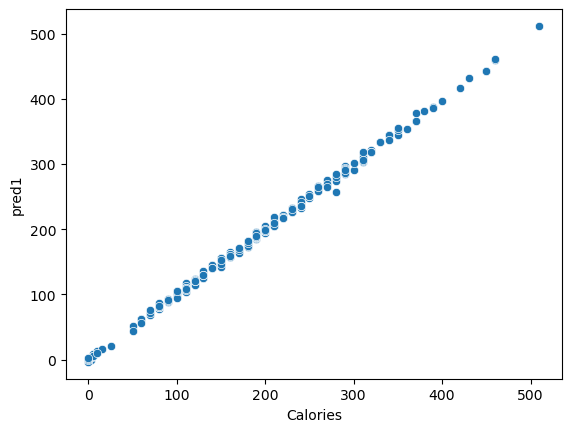

In [33]:
sns.scatterplot(x = d['Calories'], y = d['pred1']);

The scatterplot between the actual and predicted is having a good correlation.

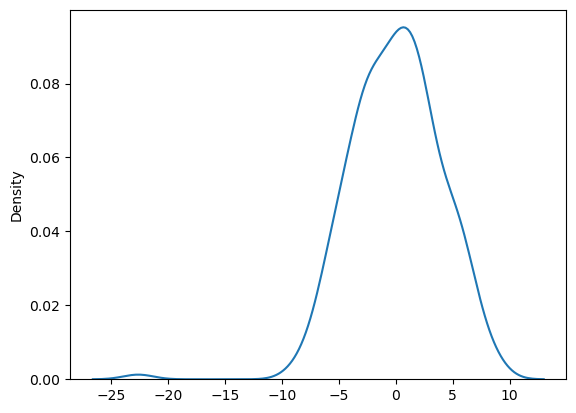

In [34]:
sns.kdeplot(d['pred1'] - d['Calories']);

The Residual (error) should be of normal distribution, and almost the same is obtained for the residuals.

### Method 2 : Using statsmodels

In [35]:
formula  = 'Calories ~ Milk + TotalFat + TransFat + SaturatedFat + Sodium + TotalCarb + Cholesterol + DietaryFibre + Sugars + Protein'
model = smf.ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3822.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          4.49e-227
Time:                        18:55:35   Log-Likelihood:                -684.28
No. Observations:                 211   AIC:                             1395.
Df Residuals:                     198   BIC:                             1438.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1914      2.114      1.983      0.049       0.023       8.360
Milk[T.Nonfat Milk]    -7.5936      2.512     -3.023      0.003     -12.547      -2.641
Milk[T.Soymilk]        -1.4655      2.661     -0.551      0.583      -6.714       3.783
Milk[T.Whole Milk]      0.6599      2.336      0.282      0.778      -3.946       5.266
TotalFat                9.4717      0.621     15.255      0.000       8.247      10.696
TransFat               -2.4153      0.959     -2.518      0.013      -4.307      -0.523
SaturatedFat          -38.7965     23.250     -1.669      0.097     -84.646       7.053
Sodium                  0.0011      0.231      0.005      0.996      -0.454       0.456
TotalCarb               0.0418      0.012      3.592      0.000       0.019       0.065
Cholesterol             0.3844      0.382      1.007      0.315      -0.368       1.137
DietaryFibre            2.7668      0.942      2.937      0.004       0.909       4.625
Sugars                  3.4873      0.375      9.295      0.000       2.747       4.227
Protein                 4.7537      0.237     20.031      0.000       4.286       5.222
==============================================================================
Omnibus:                        8.935   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               17.227
Skew:                           0.072   Prob(JB):                     0.000182
Kurtosis:                       4.392   Cond. No.                     9.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The variables such as Sodium and Cholesterol can be removed from the model as the probability is more than 5%, which means that there are no much evidence available to say that these variables are causing changes in Calories.

In [36]:
formula  = 'Calories ~ Milk + TotalFat + TransFat + SaturatedFat + TotalCarb + DietaryFibre + Sugars + Protein'
model = smf.ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4609.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          1.61e-230
Time:                        18:55:35   Log-Likelihood:                -684.82
No. Observations:                 211   AIC:                             1392.
Df Residuals:                     200   BIC:                             1429.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.4296      1.988      2.228      0.027       0.510       8.350
Milk[T.Nonfat Milk]    -7.7501      2.312     -3.352      0.001     -12.309      -3.191
Milk[T.Soymilk]        -1.4740      2.470     -0.597      0.551      -6.344       3.396
Milk[T.Whole Milk]      0.7671      2.189      0.350      0.726      -3.549       5.084
TotalFat                9.4167      0.588     16.025      0.000       8.258      10.575
TransFat               -2.2189      0.900     -2.465      0.015      -3.994      -0.444
SaturatedFat          -41.0572     14.034     -2.926      0.004     -68.730     -13.385
TotalCarb               0.0429      0.012      3.710      0.000       0.020       0.066
DietaryFibre            3.5941      0.403      8.926      0.000       2.800       4.388
Sugars                  3.8625      0.044     88.552      0.000       3.776       3.948
Protein                 4.8151      0.163     29.618      0.000       4.495       5.136
==============================================================================
Omnibus:                        9.866   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               19.484
Skew:                           0.121   Prob(JB):                     5.88e-05
Kurtosis:                       4.469   Cond. No.                     5.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model.params.abs().sort_values(ascending = False)

SaturatedFat           41.057186
TotalFat                9.416655
Milk[T.Nonfat Milk]     7.750146
Protein                 4.815116
Intercept               4.429567
Sugars                  3.862480
DietaryFibre            3.594140
TransFat                2.218890
Milk[T.Soymilk]         1.474034
Milk[T.Whole Milk]      0.767130
TotalCarb               0.042859
dtype: float64

SaturatedFat, TotalFat and NonFat Milk are having significantly more influence on Calories.

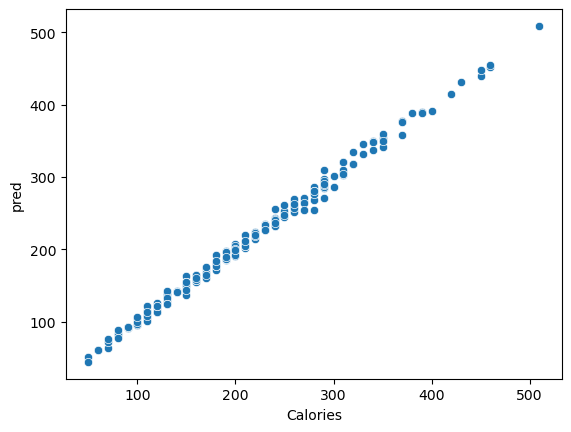

In [38]:
# Prediction :
df['pred'] = model.predict()
sns.scatterplot(x = df['Calories'], y = df['pred']);

Method 1 did better prediction and has good R-squared value than the method 2.